# Surviving the Titanic: Exploring a Tragic Voyage

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

In [112]:
#Data Loading
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
GS = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning an Feature Engineering
---

To make sense of the data, we need to clean it up first. This involves removing irrelevant information, filling in missing data, and converting some data to a more useful format. For example, we **remove** data such as the **passenger's name and id**, **cabin number**, **ticket number**, and **Embarked** which are not relevant to our analysis. We also **fill in missing data** for the **passenger's age** and **Fare** with the average of all passengers.

In [113]:
#Data Cleaning and Feature Engineering
def dataCleaning(df):
    # Droping the columns
    df.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

    # Filling the missing values
    df["Age"].fillna(df["Age"].mean(),inplace= True)
    df["Fare"].fillna(df["Fare"].mean(),inplace= True)
    
    # Feature Engineering
    df = pd.get_dummies(df, columns=['Sex'], drop_first = True)
    return df

df_train_cleaned = dataCleaning(df_train.copy())
df_test_cleaned  = dataCleaning(df_test.copy())

# Splitting the data
X_train = df_train_cleaned.drop('Survived',axis='columns')
y_train = df_train_cleaned.Survived

X_train, X_test,y_train,y_test = train_test_split(X_train,y_train,test_size = .2)

## Data analysis and visualization
---

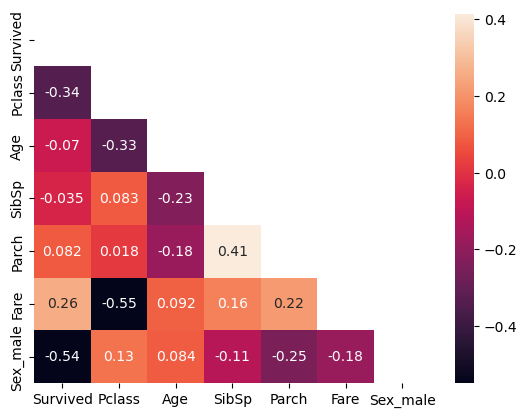

In [114]:
train_corr = df_train_cleaned.corr()
mask = np.triu(np.ones_like(train_corr, dtype=bool))
sns.heatmap(data=train_corr,annot=True, mask=mask)
plt.show()

Based on this correlation matrix of the Titanic survivors, we can conclude the following:

- There is a **positive correlation** between **survival** and **being female (Sex)**, with a correlation coefficient of 0.54. This suggests that women were more likely to survive the sinking of the Titanic than men.

- There is a **negative correlation** between **survival** and **socio-economic status (Pclass)**, with a correlation coefficient of -0.34. This suggests that passengers in higher classes were more likely to survive than those in lower classes.

Overall, this correlation matrix provides insights into the factors that influenced survival rates during the Titanic disaster. It suggests that gender, socio-economic status, and age were the most significant factors influencing survival, while family size had a weaker influence.

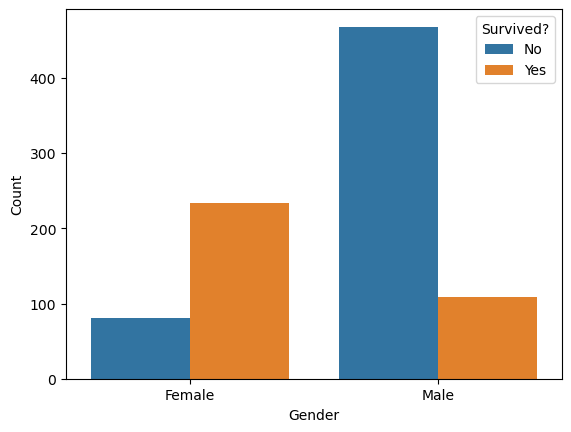

In [115]:
#Survivor count for males and females in the Titanic

grouped_data = df_train_cleaned.groupby(['Sex_male', 'Survived']).size().reset_index(name='Count')
fig,ax = plt.subplots()
labels=["No","Yes"]
sns.barplot(x='Sex_male', y='Count', hue='Survived', data=grouped_data)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Survived?")
plt.xlabel("Gender")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

The previous graph confirms the trend observed in the correlation matrix. Specifically, it shows that among the passengers on the Titanic, the majority in terms of both total number and percentage were female. This information aligns with previous findings suggesting that gender was a significant factor in determining survival rates during the tragic event.

In [2]:
# Survivors count for different Pclass

grouped_data = df_train_cleaned.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')
fig,ax = plt.subplots()
labels=["No","Yes"]
sns.barplot(x='Pclass', y='Count', hue='Survived', data=grouped_data)
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Survived?")
plt.show()

NameError: name 'df_train_cleaned' is not defined

We can see that among first-class passengers, there were more survivors (136) than non-survivors (80), while among second-class passengers, there were fewer survivors (87) than non-survivors (97). The largest number of non-survivors (372) came from the third-class passengers, while the third-class passengers also had the smallest number of survivors (119). So, we can conclude that the higher the passenger class (Pclass), the greater the chances of survival.

## Machine learning model
---

In [126]:
# Creating a logistic regression model
lr = LogisticRegression()

# Creating a grid of hyperparameters to search
param_grid = {'C': [.001, .01, .1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga'],
             'max_iter':[6000]}

grid_search = GridSearchCV(lr, param_grid, cv=5)

# Adjusting the model to the data
grid_search.fit(X_train, y_train)

# Print the hiperbest parameters and best score
print("Best hiperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Mejores hiperparámetros: {'C': 1, 'max_iter': 6000, 'penalty': 'l1', 'solver': 'liblinear'}
Mejor puntuación: 0.7976952624839948


In [128]:
# Predicting the test data

y_pred = grid_search.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


In [130]:
# Predicting submission data

predictions = grid_search.predict(df_test_cleaned)
result = pd.DataFrame({'PassengerId': df_test['PassengerId'],'Survived': predictions})


In [131]:
# Saving the submission file

result.to_csv('submission.csv',index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
